<a href="https://colab.research.google.com/github/fankyorg/Visualization/blob/main/Data_analytics_and_visualization_CAS_DFCI_Advanced_University_of_Applied_Science_Bern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Data analytics and visualization - CAS DFCI Advanced University of Applied Science Bern***


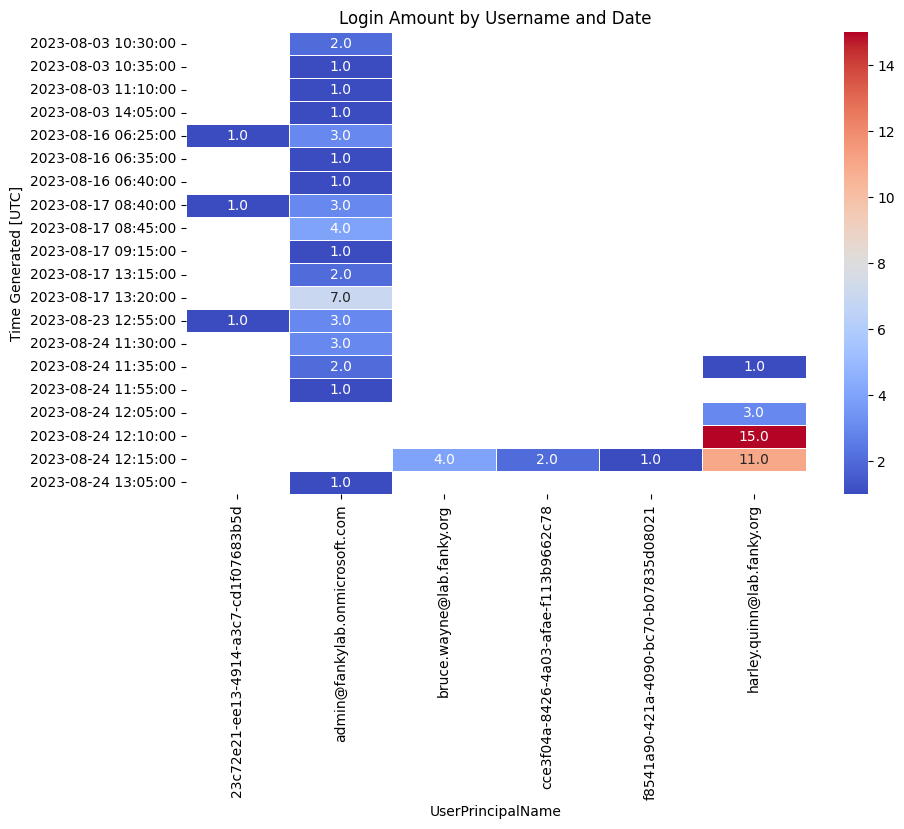

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load SignIn Logs
data = pd.read_csv('query_data.csv')

df = pd.DataFrame(data)

# Convert 'TimeGenerated [UTC]' to a datetime type
df['TimeGenerated [UTC]'] = pd.to_datetime(df['TimeGenerated [UTC]'])

# Set the 'TimeGenerated [UTC]' column as the index
df.set_index('TimeGenerated [UTC]', inplace=True)

# Create a new column with date and time with 5-minute intervals
df['DateMinute'] = df.index.floor('5T').strftime('%Y-%m-%d %H:%M:00')

# Create a pivot table, aggregating the 'Type' column by 'UserPrincipalName' and 'DateMinute'
pivot_table = df.pivot_table(values='Type', index='DateMinute', columns='UserPrincipalName', aggfunc='count')

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".1f", linewidths=.5)

# Set labels and title
plt.xlabel('UserPrincipalName')
plt.ylabel('Time Generated [UTC]')
plt.title('Login Amount by Username and Date')

# Show the heatmap
plt.show()



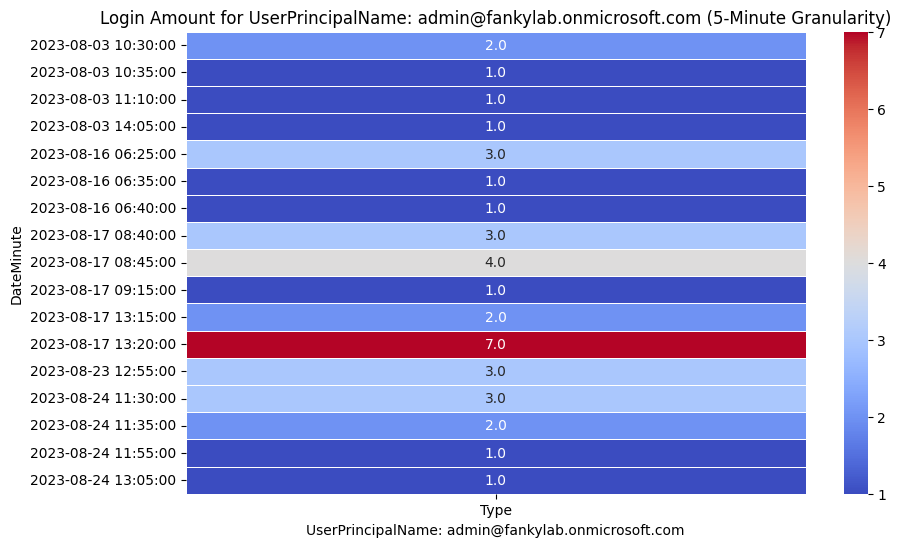

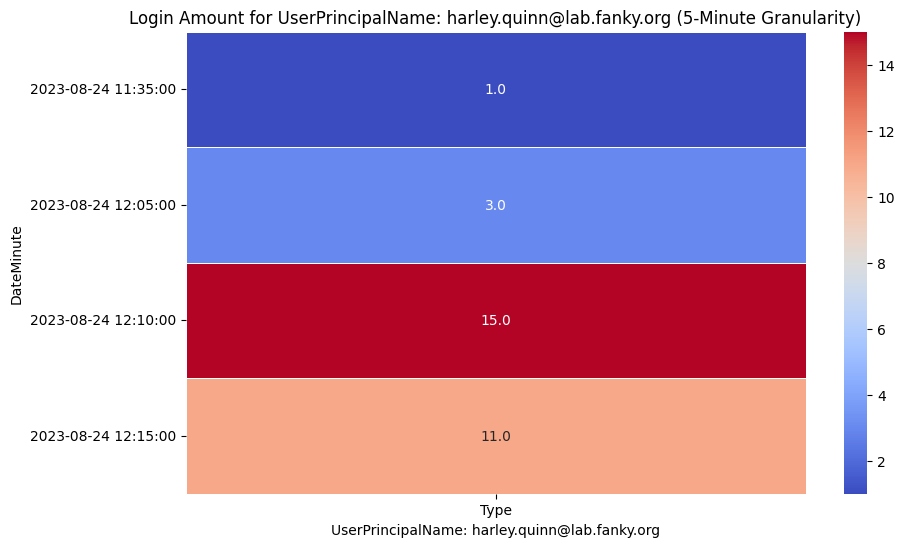

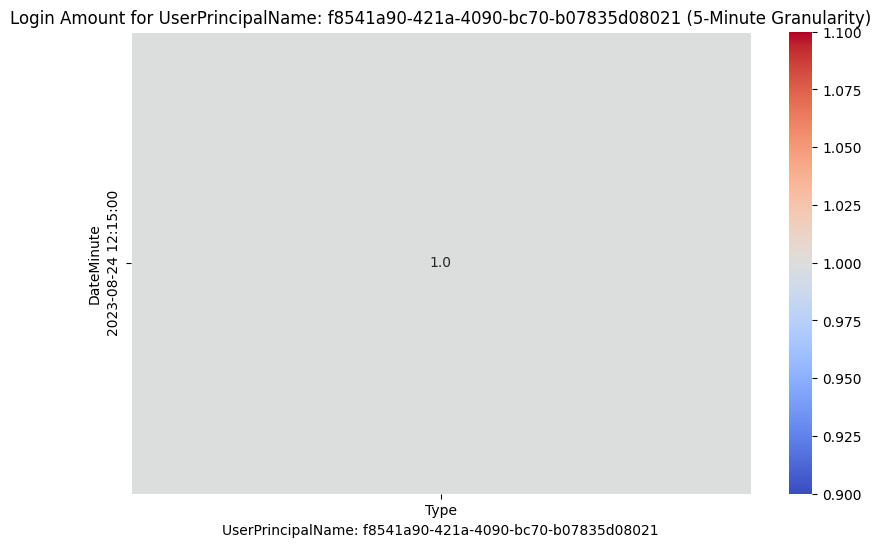

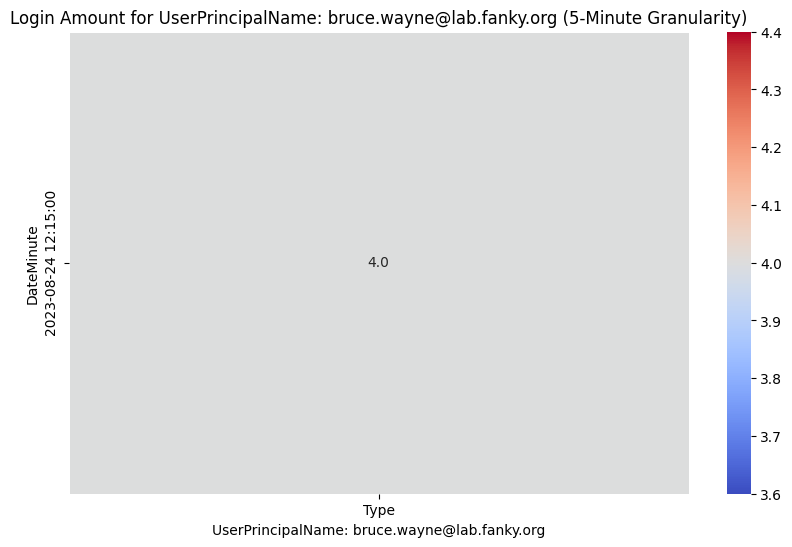

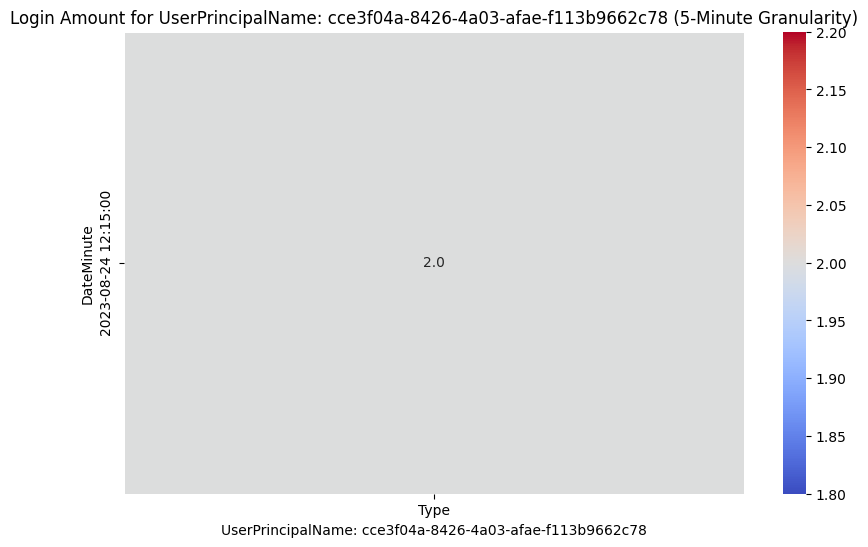

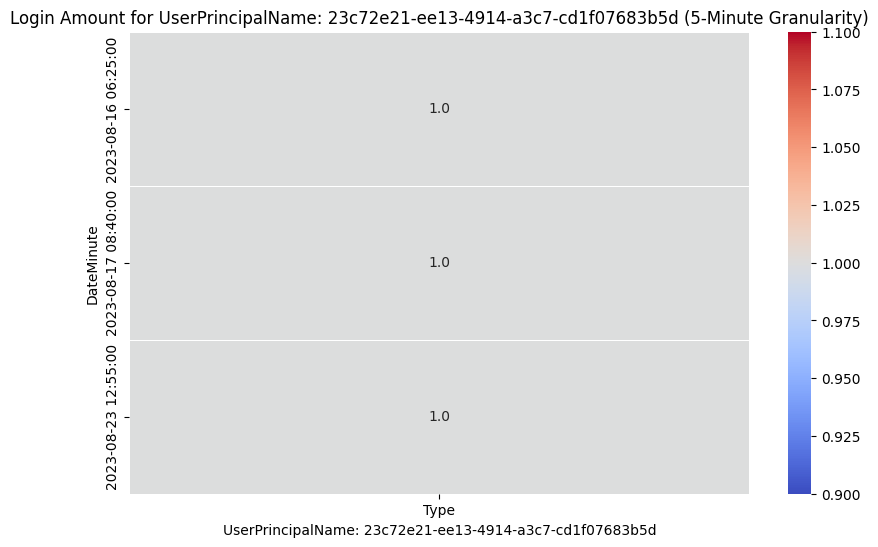

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load SignIn Logs
data = pd.read_csv('query_data.csv')

df = pd.DataFrame(data)

# Convert 'TimeGenerated [UTC]' to a datetime type
df['TimeGenerated [UTC]'] = pd.to_datetime(df['TimeGenerated [UTC]'])

# Create a new column with date and time with 5-minute intervals
df['DateMinute'] = df['TimeGenerated [UTC]'].dt.floor('5T').dt.strftime('%Y-%m-%d %H:%M:00')

# Get unique user names
unique_users = df['UserPrincipalName'].unique()

# Create a heatmap for each user
for user in unique_users:
    user_df = df[df['UserPrincipalName'] == user]

    # Create a pivot table, aggregating the 'Type' column by 'UserPrincipalName' and 'DateMinute'
    pivot_table = user_df.pivot_table(values='Type', index='DateMinute', aggfunc='count')

    # Create a heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".1f", linewidths=.5)

    # Set labels and title
    plt.xlabel(f'UserPrincipalName: {user}')
    plt.ylabel('DateMinute')
    plt.title(f'Login Amount for UserPrincipalName: {user} (5-Minute Granularity)')

    # Show the heatmap
    plt.show()


In [ ]:
pip install plotly


In [ ]:
import pandas as pd
import plotly.express as px

# Sample data (replace with your DataFrame)
data = pd.read_csv('query_data.csv')

df = pd.DataFrame(data)

# Convert 'TimeGenerated [UTC]' to a datetime type
df['TimeGenerated [UTC]'] = pd.to_datetime(df['TimeGenerated [UTC]'])

# Create a new column with date and time with 5-minute intervals
df['DateMinute'] = df['TimeGenerated [UTC]'].dt.floor('5T').dt.strftime('%Y-%m-%d %H:%M:00')

# Group by 'DateMinute', 'UserPrincipalName', and aggregate login counts
agg_df = df.groupby(['DateMinute', 'UserPrincipalName'])['Type'].count().reset_index()

# Create the tree map using Plotly Express with a larger size
fig = px.treemap(agg_df,
                  path=['DateMinute', 'UserPrincipalName'],
                  values='Type',
                  color='Type',
                  color_continuous_scale='Viridis',
                  title='Login Amounts by DateMinute and UserPrincipalName (5-Minute Granularity)',
                )

# Increase the size of the tree map
fig.update_layout(width=1800, height=1080)

# Show the tree map
fig.show()

In [ ]:
import pandas as pd
import plotly.express as px

# Load SignIn Logs
data = pd.read_csv('query_data.csv')

df = pd.DataFrame(data)

# Convert 'TimeGenerated [UTC]' to a datetime type
df['TimeGenerated [UTC]'] = pd.to_datetime(df['TimeGenerated [UTC]'])

# Create a new column with date and time with 5-minute intervals
df['DateMinute'] = df['TimeGenerated [UTC]'].dt.floor('5T').dt.strftime('%Y-%m-%d %H:%M:00')

# Extract the date from 'TimeGenerated [UTC]'
df['Date'] = df['TimeGenerated [UTC]'].dt.date

# Group by 'Date' and 'DateMinute', and aggregate login counts
agg_df = df.groupby(['Date', 'DateMinute'])['Type'].count().reset_index()

# Create the treemap using Plotly Express
fig = px.treemap(agg_df,
                 path=['Date', 'DateMinute'],
                 values='Type',
                 color='Type',
                 color_continuous_scale='Viridis',
                 title='Login Amounts by Day and 5-Minute Granularity',
                 )

# Show the treemap
fig.show()




In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Sample data (replace with your DataFrame)
# Load SignIn Logs
data = pd.read_csv('query_data.csv')

df = pd.DataFrame(data)

# Convert 'TimeGenerated [UTC]' to a datetime type and specify the time zone as UTC
df['TimeGenerated [UTC]'] = pd.to_datetime(df['TimeGenerated [UTC]']).dt.tz_localize('UTC')

# Define the start and end times for the heatmap (in UTC timezone)
heatmap_start_time = pd.Timestamp('2023-08-23 08:00:00', tz='UTC')
heatmap_end_time = pd.Timestamp('2023-08-24 16:00:00', tz='UTC')

# Create a new column with date and time rounded to the nearest 10 minutes
df['TimeRound'] = df['TimeGenerated [UTC]'].dt.round('10min')

# Create a DataFrame with all 10-minute intervals within the specified time range for the heatmap
all_intervals = pd.date_range(start=heatmap_start_time, end=heatmap_end_time, freq='10min')
all_intervals_df = pd.DataFrame({'TimeRound': all_intervals})

# Merge the original DataFrame with all_intervals_df to fill in missing intervals
merged_df = all_intervals_df.merge(df, on='TimeRound', how='left')

# Get unique UserPrincipalNames
unique_users = merged_df['UserPrincipalName'].unique()

# Create a separate heatmap for each user
for user in unique_users:
    user_data = merged_df[merged_df['UserPrincipalName'] == user]

    # Pivot the DataFrame to create a heatmap
    heatmap_data = user_data.pivot_table(values='UserPrincipalName', index=user_data['TimeRound'].dt.time, columns=user_data['TimeRound'].dt.date, aggfunc='count')

    # Create the heatmap using Plotly Express with the specified color scale
    fig = go.Figure(data=go.Heatmap(z=heatmap_data.values, x=heatmap_data.columns, y=heatmap_data.index,
                                    colorscale='bluered', text=heatmap_data.values,
                                    hoverinfo='text+x+y', colorbar=dict(title='Sign-in Counts')))

    # Customize the x-axis and y-axis labels
    fig.update_xaxes(title_text='Date')
    fig.update_yaxes(title_text='Time (Hour:Minute)')

    # Set the title for each heatmap
    fig.update_layout(title=f'Sign-in Counts for {user} (48-Hour Heatmap with 10-Minute Granularity)',
                      xaxis_nticks=len(heatmap_data.columns))

    # Show each heatmap
    fig.show()
